Youtube Analytics CS210 Project
---
---

Downloaded my Youtube data from the takeout.google.com without using any API, manually.

In [ ]:
pip install wordcloud

In [311]:
from bs4 import BeautifulSoup
import pandas as pd
import re

file_path = 'izleme geçmişi.html'

with open(file_path, 'r', encoding='utf-8') as file:
    html_data = file.read()

soup = BeautifulSoup(html_data, 'html.parser')

date_time_pattern = re.compile(r'(\d{2} \w+ \d{4} \d{2}:\d{2}:\d{2}) TRT')

data = []
for div in soup.find_all('div', class_='content-cell mdl-cell mdl-cell--6-col mdl-typography--body-1'):
    links = div.find_all('a')
    video_title = links[0].get_text(strip=True) if links else 'Unknown Title'
    channel_name = links[1].get_text(strip=True) if len(links) > 1 else 'Unknown Channel'

    watch_date_time_match = date_time_pattern.search(div.get_text())
    watch_date_time = watch_date_time_match.group(1) if watch_date_time_match else 'Unknown Date'

    data.append({
        'Video Title': video_title,
        'Channel Name': channel_name,
        'Watch Date & Time': watch_date_time
    })


df = pd.DataFrame(data)

df = df[(df['Video Title'] != 'Unknown Title') & (df['Channel Name'] != 'Unknown Channel') & (df['Watch Date & Time'] != 'Unknown Date')]



df.head(25)

,Video Title,Channel Name,Watch Date & Time
0,Bankaya para çekmeye giden teyzenin tatlılığı ...,Sosyal Reis,13 Oca 2024 00:41:56
1,"GTA 5'i, %100 Bitirirsek N'olur?",moradamofc,13 Oca 2024 00:41:55
2,sizce faul mü? arkadaşına gönder,Ruya Futbol,13 Oca 2024 00:41:25
3,Jahrein yayında Enesi ifşalıyor #shorts,NDNG Enes Batur,13 Oca 2024 00:40:37
4,Dejavu yaşatmak,Yusuf Kemer,13 Oca 2024 00:39:36
5,İlk spinde oyuna girmek mi? #shorts #casino,Kaan More Yayın,13 Oca 2024 00:38:48
6,KEREM AKTÜRKOĞLU ERZİNCANDAN GALATASARAY'A GEL...,Free Kick,13 Oca 2024 00:38:48
7,@Namikekinn saygılar sevgiler hocam 😇,1453harunn,13 Oca 2024 00:38:39
8,Trafikte En Sevmediğim Şey Tampon Yapmaları! 🔥...,KARALİ 53,13 Oca 2024 00:38:38
9,Yayında hile yaparken yakalanan 3 yayıncı!! 😶 ...,SeriBey,13 Oca 2024 00:37:35


EDA & Visualization
---

In [312]:
import re

def remove_non_alphanumeric(text):
    # Keep only alphanumeric characters [a-zA-Z0-9]
    alphanumeric_pattern = re.compile('[^a-zA-Z0-9]')
    return alphanumeric_pattern.sub('', text)

In [313]:
df['Video Title'] = df['Video Title'].apply(remove_emojis)


print(df.info())

print(df.describe())

print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2518 entries, 0 to 3819
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Video Title        2518 non-null   object
 1   Channel Name       2518 non-null   object
 2   Watch Date & Time  2518 non-null   object
dtypes: object(3)
memory usage: 78.7+ KB
None
                                              Video Title Channel Name  \
count                                                2518         2518   
unique                                               2335          746   
top     Derin Odaklanma ve Konsantrasyon Müziği | Zihi...       atahan   
freq                                                    9          131   

           Watch Date & Time  
count                   2518  
unique                  2515  
top     24 Ağu 2023 13:03:36  
freq                       2  
Video Title          0
Channel Name         0
Watch Date & Time    0
dtype: int64


In [314]:
import matplotlib.pyplot as plt
import seaborn as sns

def monthmap(date_str):
    month_mapping = {
        'Oca': 'Jan',
        'Şub': 'Feb',
        'Mar': 'Mar',
        'Nis': 'Apr',
        'May': 'May',
        'Haz': 'Jun',
        'Tem': 'Jul',
        'Ağu': 'Aug',
        'Eyl': 'Sep',
        'Eki': 'Oct',
        'Kas': 'Nov',
        'Ara': 'Dec'
    }

    day, month, year, time = date_str.split() # time will be in hh:mm:ss format
    hour, minute, second = time.split(':')
    monthnextnew = month_mapping.get(month, "Unknown")
    
    date_parsed = f"{day} {monthnextnew} {year} {hour}:{minute}:{second}"
    
    return pd.to_datetime(date_parsed, format='%d %b %Y %H:%M:%S', errors='coerce')


df['Watch Date & Time'] = df['Watch Date & Time'].apply(monthmap)

df.head(5)

,Video Title,Channel Name,Watch Date & Time
0,Bankaya para çekmeye giden teyzenin tatlılığı ...,Sosyal Reis,2024-01-13 00:41:56
1,"GTA 5'i, %100 Bitirirsek N'olur?",moradamofc,2024-01-13 00:41:55
2,sizce faul mü? arkadaşına gönder,Ruya Futbol,2024-01-13 00:41:25
3,Jahrein yayında Enesi ifşalıyor #shorts,NDNG Enes Batur,2024-01-13 00:40:37
4,Dejavu yaşatmak,Yusuf Kemer,2024-01-13 00:39:36


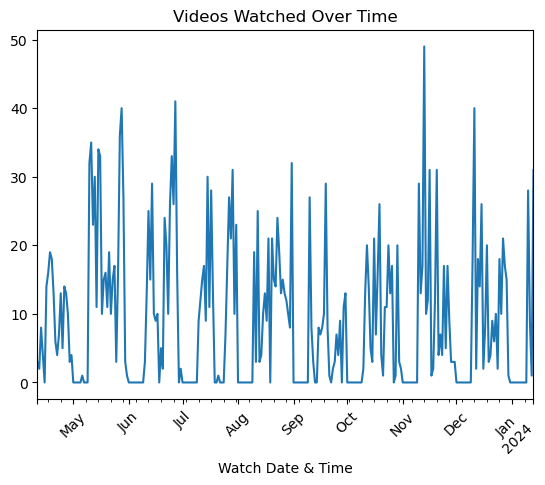

In [315]:
df.groupby(pd.Grouper(key='Watch Date & Time', freq='D')).count()['Video Title'].plot()
plt.title('Videos Watched Over Time')
plt.xticks(rotation=45)  
plt.show()


---
Top Channels I like to watch

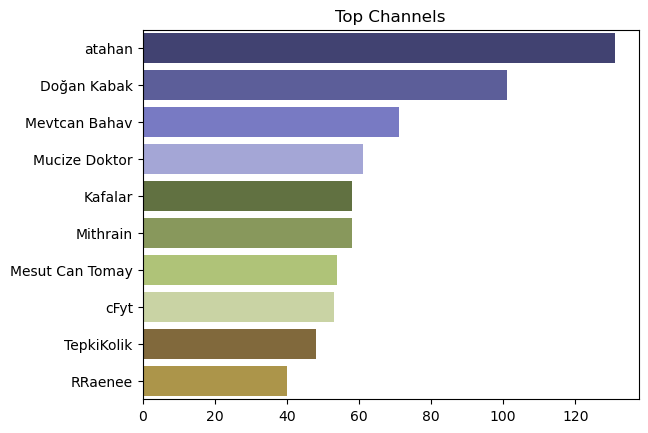

In [316]:
top_channels = df['Channel Name'].value_counts().head(10)
sns.barplot(x=top_channels.values, y=top_channels.index, palette="tab20b")
plt.title('Top Channels')
plt.show()

In [317]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


df['hour'] = df['Watch Date & Time'].dt.hour
df['day'] = df['Watch Date & Time'].dt.day_name()
df['month'] = df['Watch Date & Time'].dt.month_name()



---
Hourly, Daily and Monthly Patterns

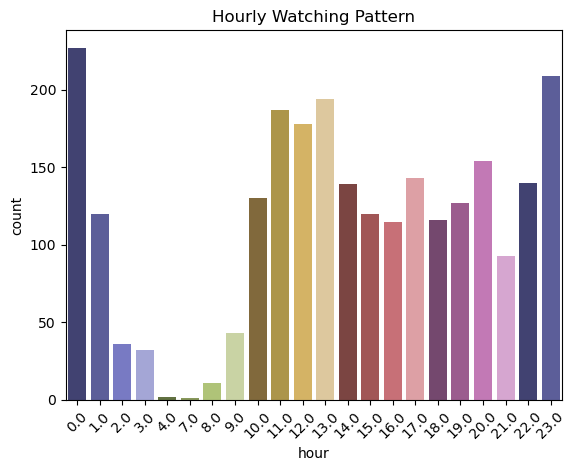

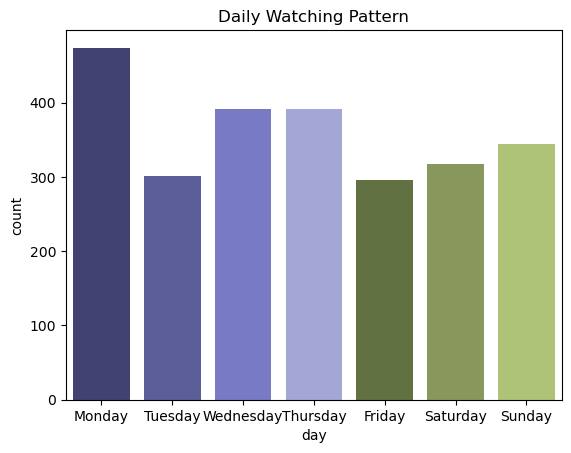

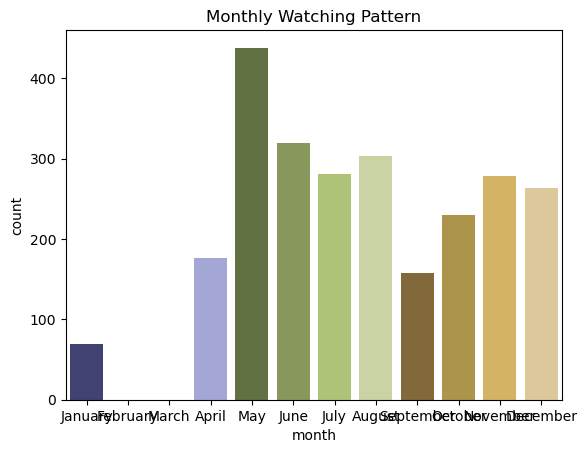

In [318]:

# Hourly Pattern
sns.countplot(x='hour', data=df, palette="tab20b")
plt.title('Hourly Watching Pattern')
plt.xticks(rotation=45)
plt.show()

# Daily Pattern
sns.countplot(x='day', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette="tab20b")
plt.title('Daily Watching Pattern')
plt.show()

# Monthly Pattern
sns.countplot(x='month', data=df, order=pd.date_range(start="1/1/2021", periods=12, freq='M').strftime("%B"), palette="tab20b")
plt.title('Monthly Watching Pattern')
plt.show()

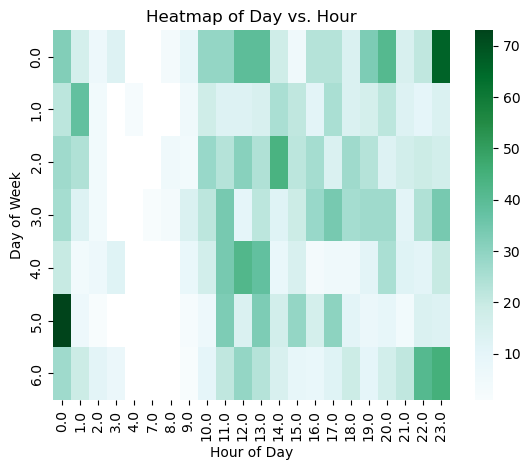

In [319]:
df['day_of_week'] = df['Watch Date & Time'].dt.dayofweek
pt = df.pivot_table(index='day_of_week', columns='hour', values='Video Title', aggfunc='count')
sns.heatmap(pt, cmap='BuGn')
plt.title('Heatmap of Day vs. Hour')
plt.ylabel('Day of Week')
plt.xlabel('Hour of Day')
plt.show()


---
Total and Average Hourly Distribution

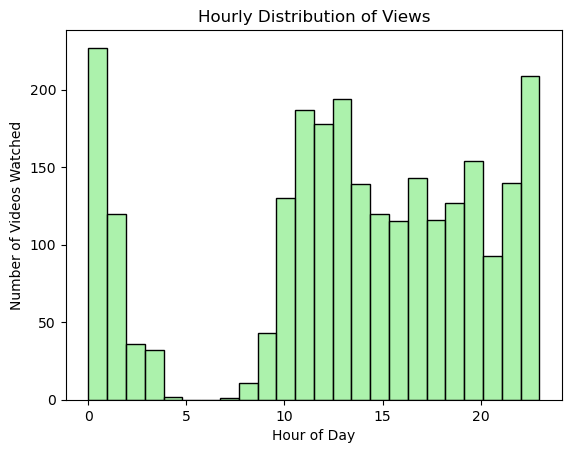

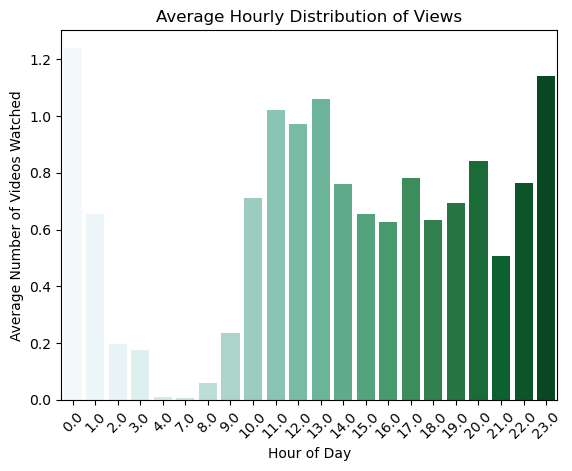

In [320]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df['hour'] = df['Watch Date & Time'].dt.hour
sns.histplot(df['hour'], bins=24, kde=False, color="lightgreen")
plt.title('Hourly Distribution of Views')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Videos Watched')
plt.show()


df['hour'] = df['Watch Date & Time'].dt.hour
df['date'] = df['Watch Date & Time'].dt.date

hourly_counts = df.groupby('hour').count()['Video Title']

num_days = df['date'].nunique()

avg_hourly_views = hourly_counts / num_days

sns.barplot(x=avg_hourly_views.index, y=avg_hourly_views.values, palette="BuGn")
plt.title('Average Hourly Distribution of Views')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Videos Watched')
plt.xticks(rotation=45)
plt.show()


---
Top Repetaed Videos

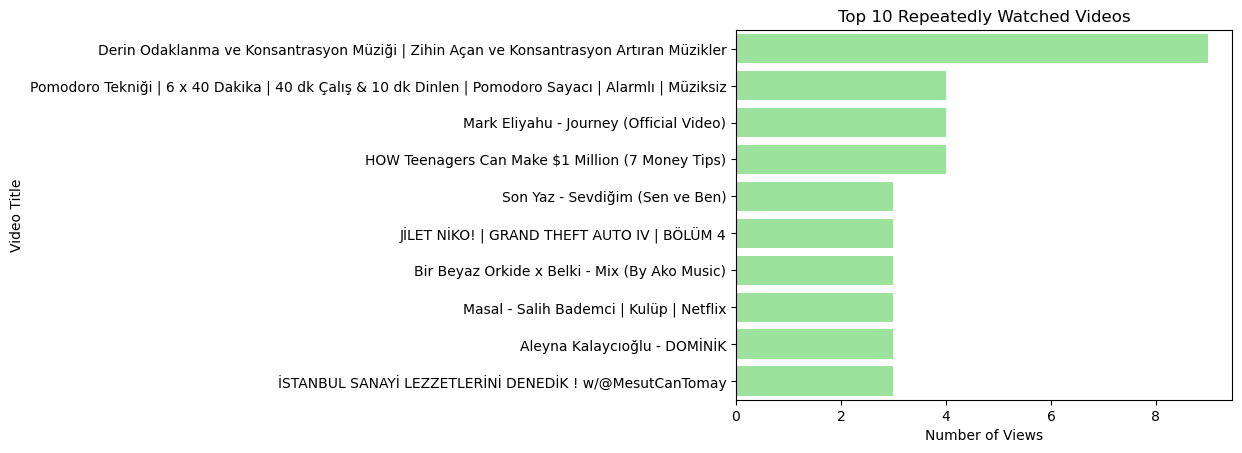

In [321]:
video_view_counts = df['Video Title'].value_counts()
repeated_videos = video_view_counts[video_view_counts > 1]
import matplotlib.pyplot as plt
import seaborn as sns

top_n = 10  
top_repeated_videos = repeated_videos.head(top_n)

sns.barplot(x=top_repeated_videos.values, y=top_repeated_videos.index, color="lightgreen")
plt.title(f'Top {top_n} Repeatedly Watched Videos')
plt.xlabel('Number of Views')
plt.ylabel('Video Title')
plt.show()


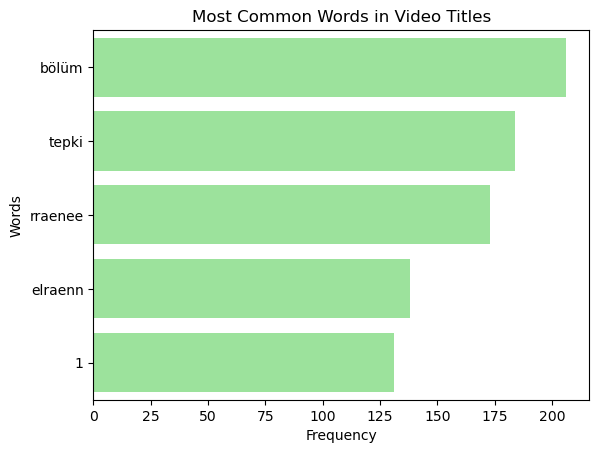

In [322]:
from collections import Counter
import re

word_counts = Counter()

for title in df['Video Title']:
    words = re.findall(r'\b\w+\b', title.lower())  
    word_counts.update(words)

# remove these
stopwords = set(['i', 've', 'en', 'the', 'and', 'to', 'of', 'a', 'in', 'for', 'is', 'on', 'that', 'with', 'as', 'this', 'by', 'are', 'it', 'be', 'from', 'at', 'which', 'or', 'an', 'was', 'have', 'not', 'your', 'they', 'can', 'will', 'if', 'has', 'but', 'all', 'their', 'more', 'when', 'what', 'also', 'has', 'any', 'our', 'about', 'you', 'my', 'out', 'we', 'us', 'up'])
filtered_word_counts = {word: count for word, count in word_counts.items() if word not in stopwords}

import matplotlib.pyplot as plt
import seaborn as sns

# get the most common words
most_common_words = dict(Counter(filtered_word_counts).most_common(5))

sns.barplot(x=list(most_common_words.values()), y=list(most_common_words.keys()), color="lightgreen")
plt.title('Most Common Words in Video Titles')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


---
For top words, trends over time

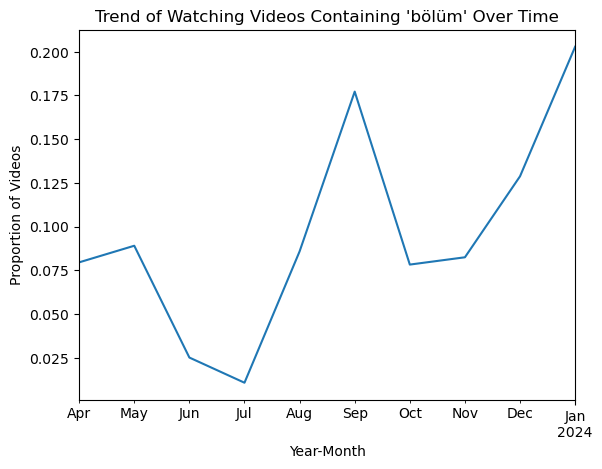

In [323]:
# trend of word over time
df['Year-Month'] = df['Watch Date & Time'].dt.to_period('M')
df['contains_word'] = df['Video Title'].str.contains('bölüm', case=False, na=False)
trend = df.groupby('Year-Month')['contains_word'].mean()

trend.plot()
plt.title("Trend of Watching Videos Containing 'bölüm' Over Time")
plt.ylabel('Proportion of Videos')
plt.xlabel('Year-Month')
plt.show()


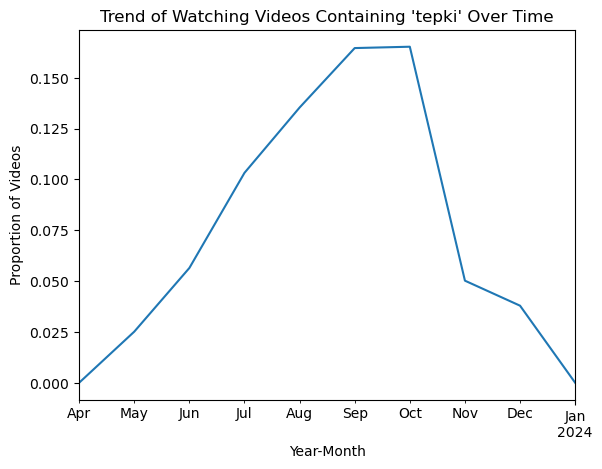

In [324]:
# trend of word over time
df['Year-Month'] = df['Watch Date & Time'].dt.to_period('M')
df['contains_word'] = df['Video Title'].str.contains('tepki', case=False, na=False)
trend = df.groupby('Year-Month')['contains_word'].mean()

trend.plot()
plt.title("Trend of Watching Videos Containing 'tepki' Over Time")
plt.ylabel('Proportion of Videos')
plt.xlabel('Year-Month')
plt.show()


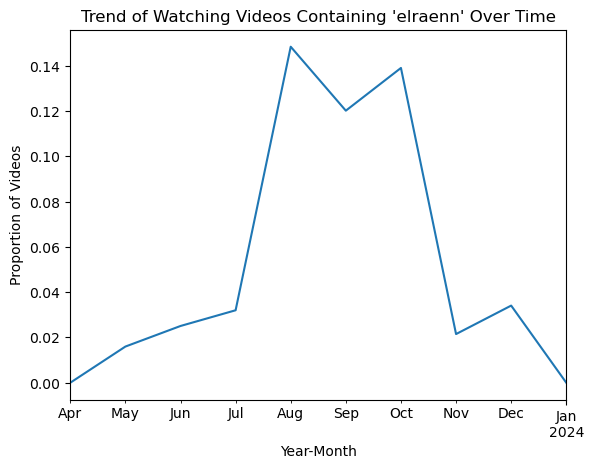

In [325]:
# trend of word over time
df['Year-Month'] = df['Watch Date & Time'].dt.to_period('M')
df['contains_word'] = df['Video Title'].str.contains('elraenn', case=False, na=False)
trend = df.groupby('Year-Month')['contains_word'].mean()

trend.plot()
plt.title("Trend of Watching Videos Containing 'elraenn' Over Time")
plt.ylabel('Proportion of Videos')
plt.xlabel('Year-Month')
plt.show()

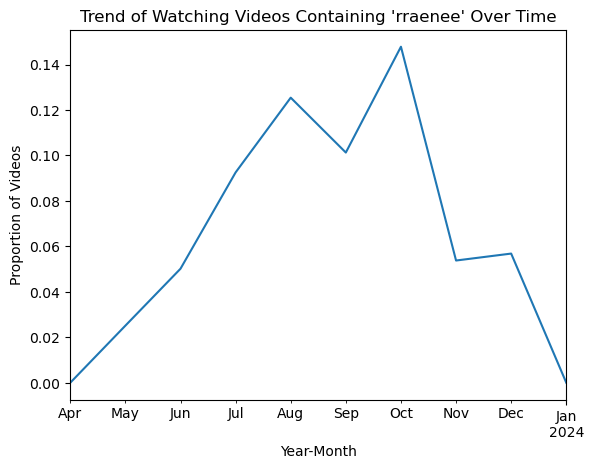

In [326]:
# trend of word over time
df['Year-Month'] = df['Watch Date & Time'].dt.to_period('M')
df['contains_word'] = df['Video Title'].str.contains('rraenee', case=False, na=False)
trend = df.groupby('Year-Month')['contains_word'].mean()

trend.plot()
plt.title("Trend of Watching Videos Containing 'rraenee' Over Time")
plt.ylabel('Proportion of Videos')
plt.xlabel('Year-Month')
plt.show()

---
Word cloud for future ML implementation to have an idea on labeling

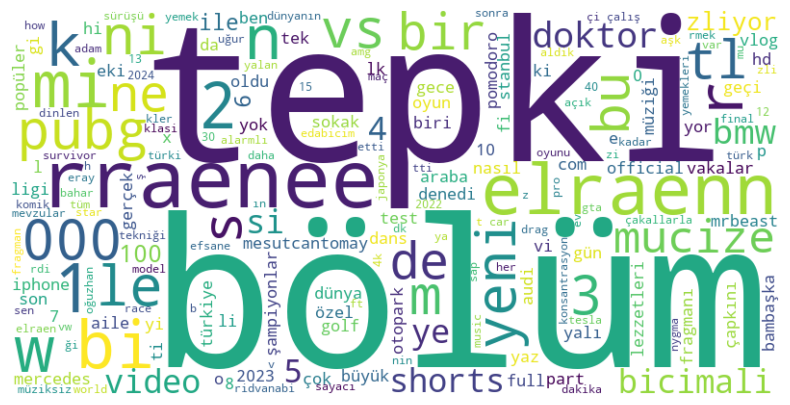

In [327]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(filtered_word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


---
Labeling data using the wordcloud

In [328]:
def categorize_title(title):
    title = title.lower()
    if any(keyword in title for keyword in ["music", "müzik", "müziği", "şarkısı", "şarkı"]):
        return "Music"
    if any(keyword in title for keyword in ["bölüm", "episode", "fragman", "trailer"]):
        return "Series/Movie"
    if any(keyword in title for keyword in ["drag", "bmw", "car", "araba", "otopark"]):
        return "Cars"
    if any(keyword in title for keyword in ["pomodoro", "çalış", "çalışmak", "final"]):
        return "Studying"
    if any(keyword in title for keyword in ["rraenee", "elraen"]):
        return "Twitch/Stream"
    if any(keyword in title for keyword in ["tepki", "vs"]):
        return "Reaction"
    return "Other"

df['Category'] = df['Video Title'].apply(categorize_title)



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Vectorizing text
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['Video Title'])
y = df['Category']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

reportxx = classification_report(y_test, y_pred)

In [331]:
print(reportxx)

               precision    recall  f1-score   support

         Cars       1.00      0.39      0.56        44
        Music       1.00      0.65      0.79        17
        Other       0.84      0.99      0.91       327
     Reaction       1.00      0.07      0.13        14
 Series/Movie       0.94      0.81      0.87        42
     Studying       0.00      0.00      0.00         4
Twitch/Stream       0.96      0.91      0.94        56

     accuracy                           0.87       504
    macro avg       0.82      0.55      0.60       504
 weighted avg       0.88      0.87      0.85       504



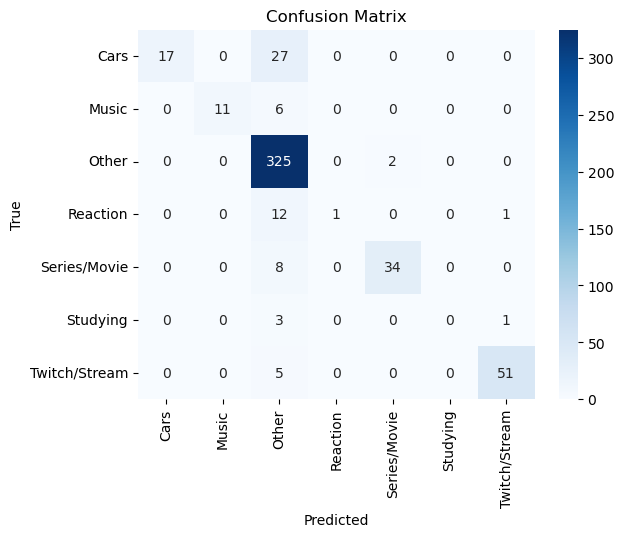

In [332]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
